In [1]:
%config Completer.use_jedi=False

In [2]:
import os
import pandas as pd
import numpy as np
import json
import cv2
from pathlib import Path
from matplotlib import pyplot as plt

from src.utils import annotation2mask

In [3]:
data_directory = Path("/data/kaggle_data/")

In [4]:
image_id = '0030fd0e6378'
train_df = pd.read_csv(data_directory / 'train.csv')

In [5]:
cell_annotations = train_df.query(f"id=='{image_id}'").annotation

In [6]:
single_cell_masks = np.array(list(map(annotation2mask, cell_annotations)))

In [7]:
image_mask = np.sum(single_cell_masks, axis=0)
image_mask[image_mask > 1] = 1
yellow_mask = np.stack([image_mask, image_mask, np.zeros_like(image_mask)], axis=2)

In [8]:
image = cv2.imread(str(data_directory / 'train' / f'{image_id}.png'))

In [9]:
image_with_mask = np.array(image + 50 * yellow_mask, dtype=np.int32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


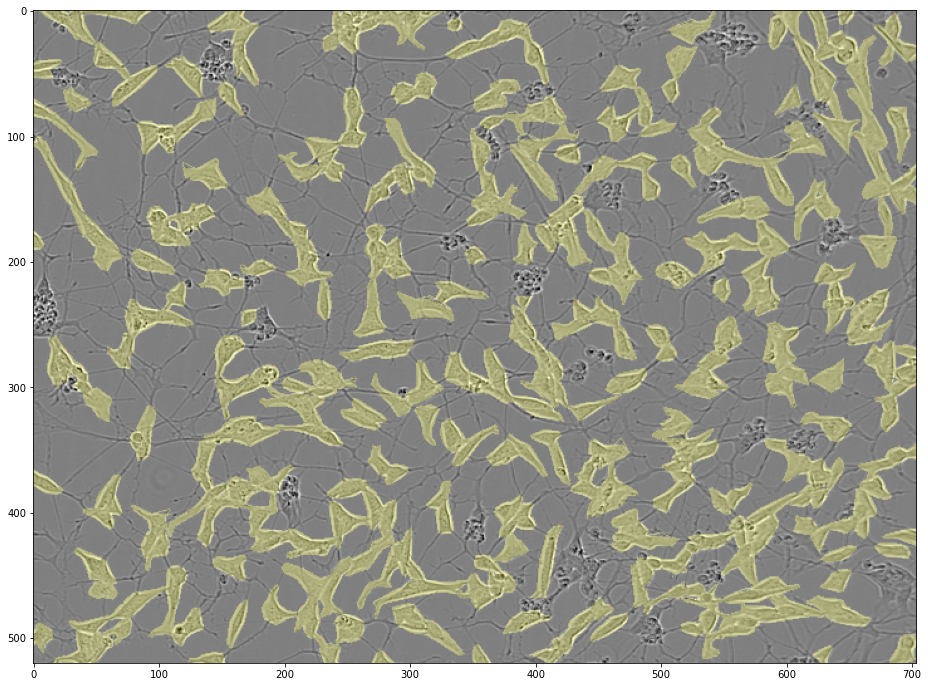

In [10]:
plt.subplots(figsize=(20, 12))
plt.imshow(image_with_mask)